<a href="https://colab.research.google.com/github/nonameretard/DummyCNNforBoris/blob/master/DummyCNNforBoris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip show tensorflow
! echo
! pip show kaggle
! echo
! pip show scikit-image

In [0]:
! pip install --upgrade --quiet tensorflow
! pip install --upgrade --quiet kaggle
# ! pip install --upgrade --quiet scikit-image # for ydbdr
# ! pip install --upgrade --quiet pillow # fix error in keras after scikit-image update

In [0]:
# 2018.11.29
# https://stackoverflow.com/questions/49310470/using-kaggle-datasets-into-google-colab

print ('Incert kaggle.json API token like')
print ('{"username":"XXXXXX","key":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}')
key = input ()
with open ('kaggle.json', 'w') as file:
    file.write (key)

! rm -rf ~/.kaggle
! mkdir -p ~/.kaggle
! mv kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
# https://www.kaggle.com/danrasband/asl-alphabet-test/home
# https://www.kaggle.com/grassknoted/asl-alphabet/home

! kaggle datasets download -d danrasband/asl-alphabet-test
! kaggle datasets download -d grassknoted/asl-alphabet

 74% 9.00M/12.2M [00:00<00:00, 20.5MB/s]
100% 12.2M/12.2M [00:00<00:00, 27.4MB/s]
100% 1.01G/1.01G [00:18<00:00, 50.6MB/s]
100% 1.01G/1.01G [00:18<00:00, 59.6MB/s]


In [0]:
# https://github.com/keras-team/keras/blob/master/keras/datasets/cifar10.py
# https://github.com/keras-team/keras/blob/master/keras/utils/data_utils.py
# http://esyr.org/uneex_disc/mounted/FreeCode/167/linux_shell/praktika_linux_05.htm

import keras

keras.utils.data_utils._extract_archive ('asl-alphabet.zip', path = '')
keras.utils.data_utils._extract_archive (
    'asl_alphabet_train.zip', path = 'data')
keras.utils.data_utils._extract_archive (
    'asl-alphabet-test.zip', path = 'data/valid')

! mv data/asl_alphabet_train data/train
! rm -rf 'asl_alphabet_test.zip'
! rm -rf data/valid/__MACOSX
! rm -rf sample_data

Using TensorFlow backend.


In [0]:
# Restart runtime, if u get error
# module 'PIL.Image' has no attribute 'register_extensions'
# after scikit-image update

print ('Take a 5 min break\n')

import gc
# https://docs.python.org/3.7/library/gc.html
gc.enable ()

img_size = 29
# 29 had best acc, 25 & 75 was worst. tested on 25-32, 35, 45, 49, 50, 64, 75

import keras
# https://keras.io/preprocessing/image/

datagen = keras.preprocessing.image.ImageDataGenerator (rescale = 1./255)
train_generator = datagen.flow_from_directory (
    'data/train', target_size = (img_size, img_size), batch_size = 87000 - 1740)
valid_generator = datagen.flow_from_directory (
    'data/valid', target_size = (img_size, img_size), batch_size = 870)

# import numpy as np
# # https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html

print ('x_train_orig'); x_train_orig = train_generator [0] [0]
print ('x_test_orig');  x_test_orig = train_generator [1] [0]
print ('x_valid_orig'); x_valid_orig = valid_generator [0] [0]

print ('y_train'); y_train = train_generator [0] [1]
print ('y_test');  y_test = train_generator [1] [1]
print ('y_valid'); y_valid = valid_generator [0] [1]

Take a 3 min break



Using TensorFlow backend.


Found 87000 images belonging to 29 classes.
Found 870 images belonging to 29 classes.
x_train_orig
x_test_orig
x_valid_orig
y_train
y_test
y_valid


In [0]:
print ('Take a 2 min break\n')

def color_convert (x):
    # http://scikit-image.org/docs/dev/api/skimage.color.html
    import skimage.color
    for i in range (x.shape [0]):
        x [i] = skimage.color.rgb2lab (x [i], illuminant = 'D75')
    return x

def filtrate (x):
    # 2018.12.08
    # https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy
    # http://scikit-image.org/docs/dev/api/skimage.filters.html
    import skimage.filters
#     lowpass = x.copy ()
    for i in range (x.shape [0]):
        for j in range (x.shape [3]):
            x [i, ..., j] = skimage.filters.sobel (x [i, ..., j])
#     x -= lowpass
    return x

def normalize (x):
    # 2018.12.22
    # L and ab separatly to [-1; 1]
    for i in range (x.shape [0]):
        x [i, ..., 0] = (x [i, ..., 0] - x [i, ..., 0].min ()) / ( 
            (x [i, ..., 0] - x [i, ..., 0].min ()).max ()) * 2 - 1
        x [i, ..., 1:3] = (x [i, ..., 1:3] - x [i, ..., 1:3].min ()) / ( 
            (x [i, ..., 1:3] - x [i, ..., 1:3].min ()).max ()) * 2 - 1
    return x

# def cannyDetect (x):
#     # 2018.12.06
#     # http://scikit-image.org/docs/dev/api/skimage.feature.html
#     import skimage.feature
#     for i in range (x.shape [0]):
#         x [i, ..., 2] = skimage.feature.canny (x [i, ..., 2], sigma = 1.5,
#             low_threshold = 0.0, high_threshold = 0.05) * 2 - 1
#         x [i, ..., 1] = skimage.feature.canny (x [i, ..., 1], sigma = 1.0,
#             low_threshold = 0.0, high_threshold = 0.10) * 2 - 1
#         x [i, ..., 0] = skimage.feature.canny (x [i, ..., 0], sigma = 1.0,
#             low_threshold = 0.0, high_threshold = 0.7) * 2 - 1
#     return x

# 2018.12.07
# https://stackoverflow.com/questions/2612802/how-to-clone-or-copy-a-list

x_train = x_train_orig.copy ()
print ('color_convert x_train'); x_train = color_convert (x_train)
print ('normalize x_train');     x_train = normalize (x_train)
print ('filtrate x_train');      x_train = filtrate (x_train)
print ('normalize x_train');     x_train = normalize (x_train)

x_test = x_test_orig.copy ()
print ('color_convert x_test');  x_test = color_convert (x_test)
print ('normalize x_test');      x_test = normalize (x_test)
print ('filtrate x_test');       x_test = filtrate (x_test)
print ('normalize x_test');      x_test = normalize (x_test)

x_valid = x_valid_orig.copy ()
print ('color_convert x_valid'); x_valid = color_convert (x_valid)
print ('normalize x_valid');     x_valid = normalize (x_valid)
print ('filtrate x_valid');      x_valid = filtrate (x_valid)
print ('normalize x_valid');     x_valid = normalize (x_valid)

# print ('cannyDetect x_test');    x_test = cannyDetect (x_test)
# print ('cannyDetect x_train');   x_train = cannyDetect (x_train)
# print ('cannyDetect x_valid');   x_valid = cannyDetect (x_valid)

gc.collect ()

Take a 2 min break

color_convert x_train
normalize x_train
filtrate x_train
normalize x_train
color_convert x_test
normalize x_test
filtrate x_test
normalize x_test
color_convert x_valid
normalize x_valid
filtrate x_valid
normalize x_valid


0

x_valid


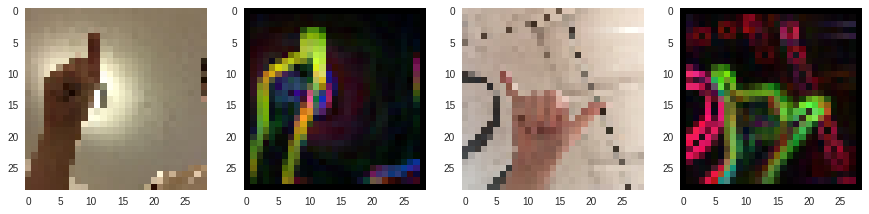

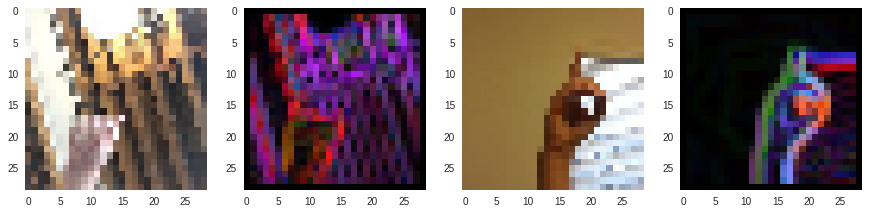

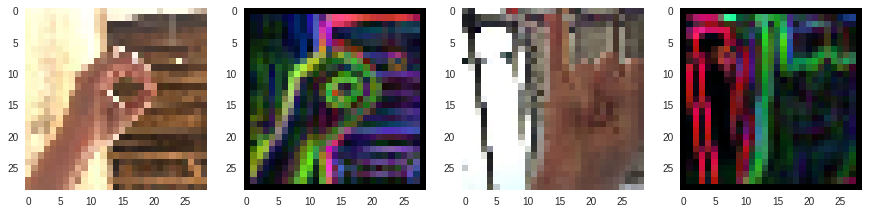

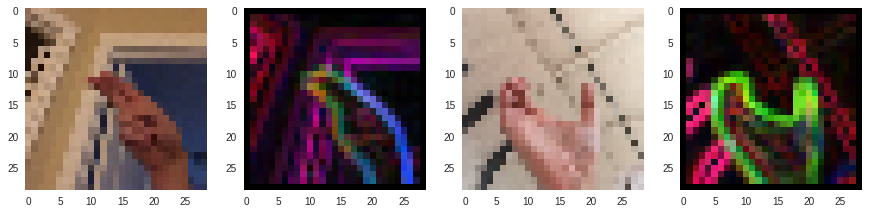

x_test


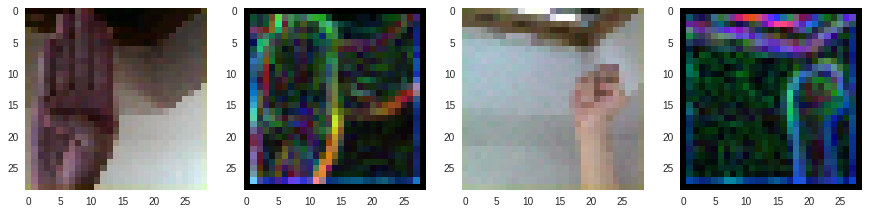

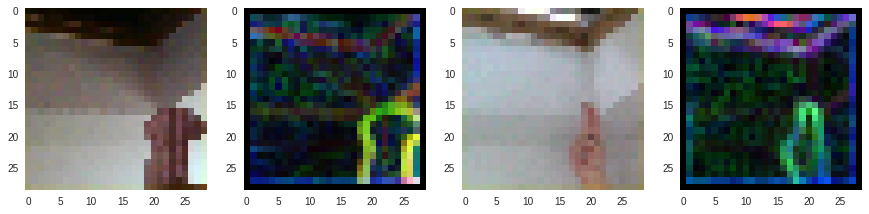

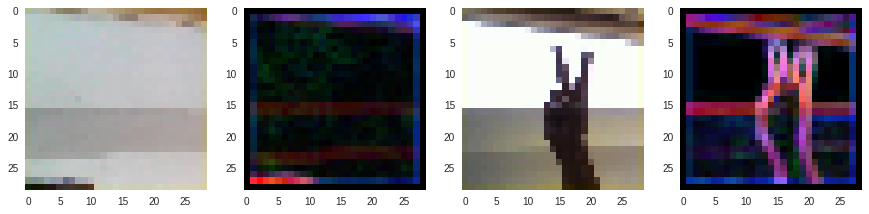

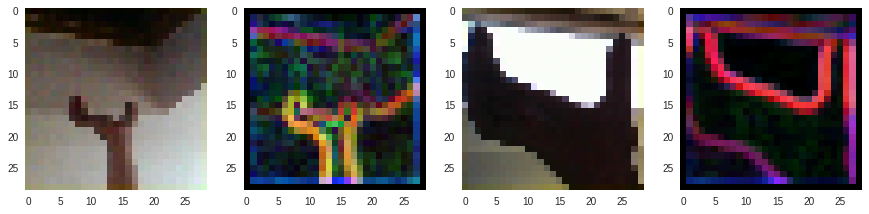

In [0]:
# 2018.12.07
# https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
# https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots
# https://stackoverflow.com/questions/45148704/how-to-hide-axes-and-gridlines-in-matplotlib-python

import matplotlib
import skimage.color

print ('x_valid')
for no_img in range (4):
    fig, (ax1, ax2, ax3, ax4) = matplotlib.pyplot.subplots (
        1, 4, figsize = (15, 15))
    ax1.grid (False); ax2.grid (False); ax3.grid (False); ax4.grid (False)
    ax1.imshow (x_valid_orig [no_img * 2])
    ax2.imshow (x_valid [no_img * 2] / 2 + 0.5)
    ax3.imshow (x_valid_orig [no_img * 2 + 1])
    ax4.imshow (x_valid [no_img * 2 + 1] / 2 + 0.5)
    matplotlib.pyplot.show ()
    
print ('x_test')
for no_img in range (4):
    fig, (ax1, ax2, ax3, ax4) = matplotlib.pyplot.subplots (
        1, 4, figsize = (15, 15))
    ax1.grid (False); ax2.grid (False); ax3.grid (False); ax4.grid (False)
    ax1.imshow (x_test_orig [no_img * 2])
    ax2.imshow (x_test [no_img * 2] / 2 + 0.5)
    ax3.imshow (x_test_orig [no_img * 2 + 1])
    ax4.imshow (x_test [no_img * 2 + 1] / 2 + 0.5)
    matplotlib.pyplot.show ()

In [0]:
# 2018.10.29
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
# 2018.11.20
# https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# 2018.11.23
# https://github.com/jacobkimmel/lanternfish/blob/master/bestiary.py

import tensorflow as tf 

# tf.nn.relu6
# hard_sigmoid + selu + softmax = 36%
# tf.math.cosh + selu + softmax = 39%

IN = keras.layers.Input (shape = (img_size, img_size, 3))

x = keras.layers.Conv2D (128, 3) (IN)
x = keras.layers.MaxPool2D (3) (x)
x = keras.layers.BatchNormalization (
    momentum = 0.2, epsilon = 0.1, center = False) (x)
x = keras.layers.Conv2D (512, 3) (x)
x = keras.layers.MaxPool2D (3) (x)
x = keras.layers.BatchNormalization (
    momentum = 0.2, epsilon = 0.1, center = False) (x)
# x = keras.layers.SpatialDropout2D (0.5) (x)
x = keras.layers.GlobalMaxPool2D () (x)
x = keras.layers.GaussianNoise (13) (x)
x = keras.layers.Dense (
    y_test.shape [1],
    activation = 'softmax',
    kernel_initializer = 'VarianceScaling',
    activity_regularizer = keras.regularizers.l1 (0.001)
) (x)

# VarianceScaling Orthogonal glorot_normal he_uniform Ones Zeros

# x = keras.layers.Maximum () ([x, y])
# x = keras.layers.Lambda (lambda x: x ** 2) (x)

model = keras.models.Model (inputs = IN, outputs = x)

model.compile (
    optimizer = keras.optimizers.Adam (),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit (x_train, y_train, batch_size = 256, epochs = 5, verbose = 1,
    validation_data = (x_valid, y_valid)
)
score = model.evaluate (x_test, y_test, verbose = 0)
print ('test accuracy:', score [1])

Train on 85260 samples, validate on 870 samples
Epoch 1/5
85260/85260 [==============================] - 15s 172us/step - loss: 11.3232 - acc: 0.1502 - val_loss: 3.3858 - val_acc: 0.3977
Epoch 2/5
85260/85260 [==============================] - 14s 162us/step - loss: 5.5162 - acc: 0.3881 - val_loss: 3.0146 - val_acc: 0.4494
Epoch 3/5
85260/85260 [==============================] - 14s 161us/step - loss: 2.6762 - acc: 0.5090 - val_loss: 2.5066 - val_acc: 0.4667
Epoch 4/5
85260/85260 [==============================] - 14s 162us/step - loss: 1.9082 - acc: 0.5818 - val_loss: 2.3568 - val_acc: 0.4678
Epoch 5/5
85260/85260 [==============================] - 14s 162us/step - loss: 1.6030 - acc: 0.6416 - val_loss: 2.2661 - val_acc: 0.5092
test accuracy: 0.9413793104818498


In [0]:
model.save ('my_model.h5')

In [0]:
import keras
import tensorflow as tf

# https://qiita.com/koichirokamoto/items/f53ec906b6fd71947c3f

model1 = keras.models.load_model ('my_model.h5',
#     custom_objects = {'relu6': tf.nn.relu6}
)
score = model1.evaluate (x_valid, y_valid, verbose = 0)
print ('valid loss:', score [0])
print ('valid accuracy:', score [1])

valid loss: 2.0599733426653106
valid accuracy: 0.5091954022988506
